In [132]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [161]:
X, h = np.linspace(0, 4, 46, retstep=True)

In [162]:
Y = 1 + np.sin(3*X)

In [163]:
matrix = np.eye(X.shape[0]-1) + np.eye(X.shape[0]-1, k=-1)

In [164]:
b = np.append(0, 1/h**2*(Y[2:]-2*Y[1:-1]+Y[:-2]))

In [165]:
c = np.linalg.solve(matrix, b)

In [166]:
result_x = []
result_y = []

for i in range(X.shape[0]-1):
    x = np.linspace(X[i], X[i+1], 1000)
    S_2 = Y[i] + ((Y[i+1]-Y[i])/(X[i+1]-X[i]))*(x-X[i]) + c[i]*(x-X[i])*(x-X[i+1])
    
    result_x.append(x)
    result_y.append(S_2)
    
result_y = np.concatenate(result_y)
result_x = np.concatenate(result_x)

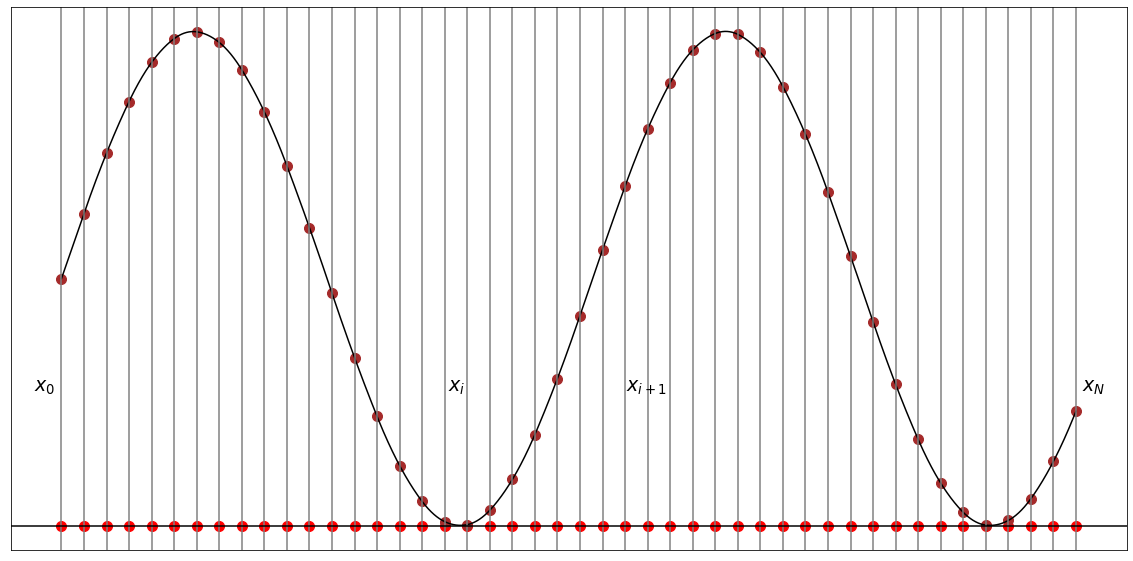

In [167]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(result_x, result_y, color="black")
ax.scatter(X, X*0, color="red", s=100)
ax.scatter(X, Y, color="brown", s=100)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for j, _ in enumerate(X):
    ax.axvline(x=X[j], color="gray")

ax.axhline(y=0, color="black")

ax.text(0.03, 0.3, '$x_{0}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)

ax.text(0.57, 0.3, '$x_{i+1}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)

ax.text(0.4, 0.3, '$x_{i}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)

ax.text(0.97, 0.3, '$x_{N}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=19)


fig.savefig("images/image_7.png")    
plt.show()

In [168]:
image = cv2.imread("images/image_7.png")

In [138]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [139]:
cv2.imwrite("images/image_7.png", image)

True

In [152]:
from scipy.ndimage import label, generate_binary_structure
import numpy as np
a = np.array([0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0])
labels, classes = label(a)
print(labels, classes, sep="\n")

[0 0 1 1 0 0 2 2 2 0 0 0 3 3 3 0 0 0]
3
